In this assignment, you will apply Linear Algebra and Probability techniques to analyze the Wine
Quality Dataset. The dataset consists of 1599 rows and 12 columns, detailing various chemical
properties of red and white wines and their quality scores. Your tasks will focus on vectors,
matrices, eigenvalues, eigenvectors, and basic probability concepts. You can download the
dataset from the link given below. The dataset contains 1599 samples of wine, with features
such as acidity, alcohol content, pH, residual sugar, and others, alongside the target variable,
wine quality.
1. Load the dataset and handle any missing data by replacing null values with the mean
value of the respective column. (Score 2)
2. Extract the following columns as vectors: alcohol,citric acid. (Score 2)
3. Select two features (e.g., alcohol and density) from the dataset and calculate the
covariance matrix using np.cov(X.T), where X is the feature matrix consisting of the
selected columns.(Score 2)
4. Perform eigen decomposition on the covariance matrix you computed in question 3.
Identify and interpret the results:Identify the top 2 eigenvalues of the covariance
matrix,Identify the corresponding eigenvectors.(Score 2)
5. Which wine quality is most common in the dataset? How can you interpret the
distribution of wine quality scores? (Score 2)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [22]:
wine_data=pd.read_csv("winequality-red.csv",sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
wine_data.isnull().sum()
#no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# 1.First check for missing values , Load the dataset and handle any missing data by replacing null values with the mean
# value of the respective column. (Score 2)

check_missing = wine_data.isnull().sum()
print("Missing values in each column:\n", check_missing)

# Since there are no missing values in the dataset, we do not need to replace any null values.



Missing values in each column:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Extract the following columns as vectors: alcohol,citric acid. (Score 2)
alcohol_vector=wine_data['alcohol'].values
citric_acid_vector=wine_data['citric acid'].values
print("Alcohol Vector:\n", alcohol_vector)
print("Citric Acid Vector:\n", citric_acid_vector)  




Alcohol Vector:
 [ 9.4  9.8  9.8 ... 11.  10.2 11. ]
Citric Acid Vector:
 [0.   0.   0.04 ... 0.13 0.12 0.47]


In [36]:
# 3. Select two features (e.g., alcohol and density) from the dataset and calculate the
# covariance matrix using np.cov(X.T), where X is the feature matrix consisting of the
# selected columns.(Score 2)
selected_features = wine_data[['alcohol', 'density']].values
cov_matrix_1=np.cov(selected_features.T)
print("Covariance Matrix:\n", cov_matrix)   

selected_features = wine_data[['fixed acidity', 'citric acid']].values
cov_matrix_2=np.cov(selected_features.T)
print("Covariance Matrix:\n", cov_matrix)   

Covariance Matrix:
 [[3.03141639 0.22782   ]
 [0.22782    0.03794748]]
Covariance Matrix:
 [[3.03141639 0.22782   ]
 [0.22782    0.03794748]]


In [49]:
# 4. Perform eigen decomposition on the covariance matrix you computed in question 3.
# Identify and interpret the results:Identify the top 2 eigenvalues of the covariance
# matrix,Identify the corresponding eigenvectors.(Score 2)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix_1)
print("Eigenvalues of cov_matrix_1:\n", eigenvalues)
print("Eigenvectors of cov_matrix_1:\n", eigenvectors)  
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix_2)
print("Eigenvalues of cov_matrix_2:\n", eigenvalues)        
print("Eigenvectors of cov_matrix_2:\n", eigenvectors)


top_2_eigenvalues = np.sort(eigenvalues)[-2:]
print("top 2 eigen values:",top_2_eigenvalues)
top_2_eigenvectors = eigenvectors[np.argsort(eigenvalues)[-2:]]
print("top 2 eigen vectors:",top_2_eigenvectors)




Eigenvalues of cov_matrix_1:
 [1.13564827e+00 2.68507580e-06]
Eigenvectors of cov_matrix_1:
 [[ 9.99999614e-01  8.78753184e-04]
 [-8.78753184e-04  9.99999614e-01]]
Eigenvalues of cov_matrix_2:
 [3.04865551 0.02070836]
Eigenvectors of cov_matrix_2:
 [[ 0.99714927 -0.07545419]
 [ 0.07545419  0.99714927]]
top 2 eigen values: [0.02070836 3.04865551]
top 2 eigen vectors: [[ 0.07545419  0.99714927]
 [ 0.99714927 -0.07545419]]


count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

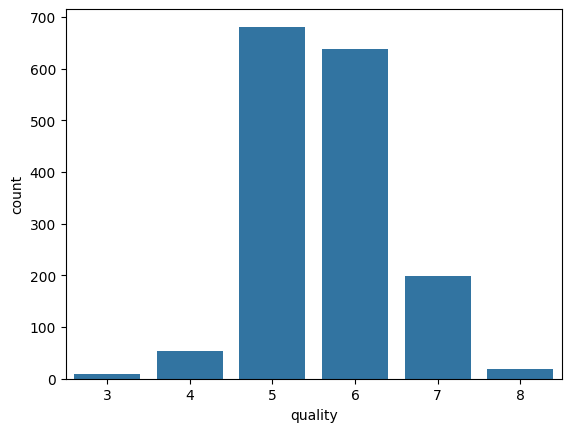

In [ ]:
# 5. Which wine quality is most common in the dataset? How can you interpret the
# distribution of wine quality scores? (Score 2)
quality=wine_data['quality'].unique()
wine_data['quality'].value_counts()

sns.countplot(x='quality',data=wine_data)   
# quality score 5 is most common in the dataset
wine_data['quality'].describe()
# The distribution of wine quality scores is approximately normal distribution, with most wines scoring between 5 and 6.
